In [6]:
import pandas as pd
import csv

def makecsv(fname,N,m,F,df):
    h=0.05
    t=0.0
    
    Xa = np.full((N),F)
    c=int(N/2-1)
    Xa[c] += df
    
    X = []
    time = []
    
    for i in np.arange(1,m):
        Xb = Rungekutta4(Xa,h,F)
        Xa=Xb
        t=t+h
        if i > 1460:
            X.append(Xa)
            time.append(t)
        
    df=pd.DataFrame(X)
    df.to_csv(fname,index=False)
    
    dataset = pd.read_csv(fname)
    print(dataset)
    array = dataset.values
    #print(array)
    
    return array

             0         1          2         3         4         5         6  \
0    -4.577655 -2.752373   0.099049  0.677744  5.934551 -0.679750 -2.954209   
1    -3.492238 -2.382872  -0.132460  1.021116  5.995053 -1.253493 -2.160478   
2    -1.737512 -2.129497  -0.155935  1.296183  6.018508 -1.643000 -1.247249   
3     0.132688 -1.731283   0.028431  1.592421  5.997327 -1.819359 -0.291257   
4     1.660538 -1.145299   0.355962  1.971286  5.920252 -1.806988  0.611892   
5     2.613184 -0.497191   0.727151  2.440736  5.775701 -1.667487  1.387096   
6     2.985288  0.076291   1.083551  2.970887  5.556828 -1.471157  2.000461   
7     2.902180  0.527611   1.426230  3.527653  5.259192 -1.275429  2.454620   
8     2.533719  0.894443   1.785871  4.085551  4.872934 -1.115909  2.770881   
9     2.059085  1.242739   2.197940  4.620592  4.377801 -1.004464  2.972569   
10    1.652102  1.619169   2.693192  5.097779  3.745427 -0.928768  3.077689   
11    1.456050  2.045040   3.288462  5.459081  2.951

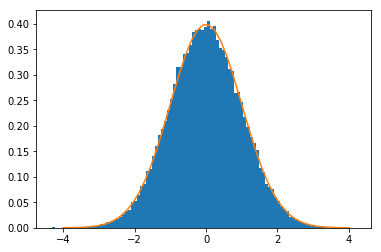

[[ 0.0944859   0.3906035   0.46231822 ... -0.3953373  -0.88024753
  -0.14211923]
 [-0.68441599 -1.69358656 -0.4938801  ...  3.25969074  0.28962097
  -0.65038118]
 [-0.0839342   0.85535307 -0.32625674 ... -0.3512024  -0.284184
   0.3870802 ]
 ...
 [-0.07112959  0.14101542 -0.73297307 ...  1.08815778  1.46225043
  -0.17374715]
 [-1.51864373 -0.30078682  0.84947107 ...  1.07707863  0.61378347
   1.86055646]
 [ 0.50859369  1.71795353 -0.50329058 ... -0.64941685 -0.07633525
   0.99869543]]


In [19]:
import random
import matplotlib.pyplot as plt

n=40
fname="data.csv"
data = makecsv(fname,n,2921,8.0,0.008)
N = data.size
R = []
x = np.linspace(-n,n)
x = x * 0.1
y = np.exp(-x*x/2)/np.sqrt(2*np.pi)
for i in range(N):
    R.append(random.normalvariate(0.0,1.0))
plt.hist(R,bins=100,density=True)
plt.plot(x,y)
plt.show()
oberr = np.array(R).reshape(1460,n)
print(oberr)
for i in range(1460):
    data[i] += oberr[i]
    
df=pd.DataFrame(data)
df.to_csv("observation_data.csv",index=False)
    

             0         1          2         3         4         5         6  \
0    -4.577655 -2.752373   0.099049  0.677744  5.934551 -0.679750 -2.954209   
1    -3.492238 -2.382872  -0.132460  1.021116  5.995053 -1.253493 -2.160478   
2    -1.737512 -2.129497  -0.155935  1.296183  6.018508 -1.643000 -1.247249   
3     0.132688 -1.731283   0.028431  1.592421  5.997327 -1.819359 -0.291257   
4     1.660538 -1.145299   0.355962  1.971286  5.920252 -1.806988  0.611892   
5     2.613184 -0.497191   0.727151  2.440736  5.775701 -1.667487  1.387096   
6     2.985288  0.076291   1.083551  2.970887  5.556828 -1.471157  2.000461   
7     2.902180  0.527611   1.426230  3.527653  5.259192 -1.275429  2.454620   
8     2.533719  0.894443   1.785871  4.085551  4.872934 -1.115909  2.770881   
9     2.059085  1.242739   2.197940  4.620592  4.377801 -1.004464  2.972569   
10    1.652102  1.619169   2.693192  5.097779  3.745427 -0.928768  3.077689   
11    1.456050  2.045040   3.288462  5.459081  2.951

            0          1          2         3         4         5         6   \
0     4.375308   1.770245   0.144916  0.958891  6.856177  1.269853  2.853727   
1     2.086356   2.952917  -0.557091  1.984006  6.155208 -0.106441  2.386250   
2     0.149615   2.142950   0.696549  0.391007  6.953230  1.473512  1.334202   
3    -0.221137   3.786884   0.193886  0.921857  4.050661  2.500322  1.345721   
4     1.116950   1.887933   1.316514  2.365568  4.692113  2.008961  1.171548   
5     1.445807  -0.576347   0.125534  2.960773  6.425578  2.813363  2.705177   
6     1.351839   0.725720  -0.786773  1.929583  6.477970  2.551401  2.362014   
7     1.979857   0.100406   1.461640  3.168259  5.905005  1.872835  2.414207   
8     3.676797   1.593109   1.896739  2.329476  5.393867  1.559033 -0.717747   
9     3.160078   0.942847   2.908521  6.048555  4.516992  1.254602  2.369900   
10    1.109979   0.219207   3.528076  4.063233  4.431071  0.157923  3.004846   
11    1.916248   1.075926   2.334096  5.

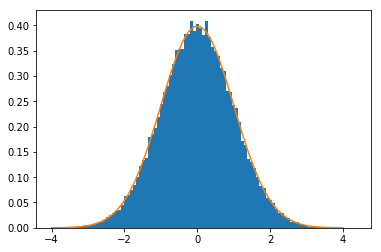

In [7]:
n=40
fname="data3.csv"
data = makecsv(fname,n,2921,8.0,0.008).reshape(1460,-1)
obdata = np.sqrt(data*data)
N = obdata.size
R = []
x = np.linspace(-40,40)
x = x * 0.1
y = np.exp(-x*x/2)/np.sqrt(2*np.pi)
for i in range(N):
    R.append(random.normalvariate(0.0,1.0))
plt.hist(R,bins=100,density=True)
plt.plot(x,y)
oberr = np.array(R).reshape(obdata.shape)
for i in range(1460):
    obdata[i] += oberr[i]
#obdata[obdata<0]=0.0
df=pd.DataFrame(obdata)
print(df)
df.to_csv("observation_data3.csv",index=False)


In [1]:
# !/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import random
import pandas as pd
import csv


# Particle filter



def L96(Xa,F):

    F_ = (np.roll(Xa, -1,axis=0) - np.roll(Xa, 2,axis=0)) * np.roll(Xa, 1,axis=0) -  Xa + F
    
    return F_

def L96_rnd(Xa,F,dn):
    
    F_ = (np.roll(Xa, -1,axis=0) - np.roll(Xa, 2,axis=0)) * np.roll(Xa, 1,axis=0) -  Xa + F * (1+dn)
    
    return F_
    
#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    
    F_ = L96(Xa,F)
    #F_ = L96_rnd(Xa,F,dn)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    #F_ = L96_rnd(X2,F,dn)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    #F_ = L96_rnd(X3,F,dn)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    #F_ = L96_rnd(X4,F,dn)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

def Rungekutta4_rnd(Xa,h,F,dn):
    
    #F_ = L96(Xa,F)
    F_ = L96_rnd(Xa,F,dn)
    K1 = h*F_

    X2=Xa+K1/2
    #F_ = L96(X2,F)
    F_ = L96_rnd(X2,F,dn)
    K2=h*F_
    
    X3=Xa+K2/2
    #F_ = L96(X3,F)
    F_ = L96_rnd(X3,F,dn)
    K3=h*F_
    
    X4=Xa+K3
    #F_ = L96(X4,F)
    F_ = L96_rnd(X4,F,dn)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

def Forecast(Xa,m):
    h = 0.05 
    F = 8.0
    
    
    Xf = np.empty(Xa.shape)
    Xf = Rungekutta4(Xa,h,F)
    #print(Xf)
    #Xf_ = np.sum(Xf,axis=1)/m
    #print(Xf_.shape)
    #dX = [Xf[:,k]-Xf_ for k in range(m)]
    #dXf = Xf - Xf_.reshape(-1,1)
    #dXf = np.array(dX).reshape(m,N).T
    #print(dXf)
    
    return Xf

def Forecast_rnd(Xa,m,dn):
    h = 0.05 
    F = 8.0
    
    
    Xf = np.empty(Xa.shape)
    Xf = Rungekutta4_rnd(Xa,h,F,dn)
    #print(Xf)
    #Xf_ = np.sum(Xf,axis=1)/m
    #print(Xf_.shape)
    #dX = [Xf[:,k]-Xf_ for k in range(m)]
    #dXf = Xf - Xf_.reshape(-1,1)
    #dXf = np.array(dX).reshape(m,N).T
    #print(dXf)
    
    return Xf

def Analysis(Xf,y,m,Wa,sigma):
    N = Xf.shape[0]
    R = np.eye(m)
    I = np.eye(N)
    
    Xa = Xf
    W = np.exp(-(Xf-y.reshape(-1,1))**2/2*sigma*sigma)
    Wb = Wa*W
    for i in range(N):
        Wb[i] = Wb[i]/np.sum(Wb[i])
        
    Xa_ = np.sum(Xa*Wb,axis=1)
    
    
    return Xa,Xa_,Wb




1.0 1.08
SISm=1000.jpg


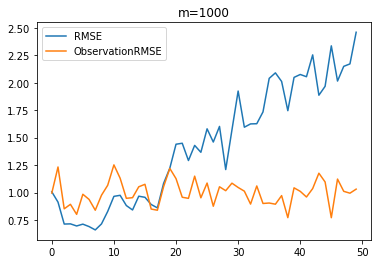

5.1302660789302434
SISm=1000Neff.jpg


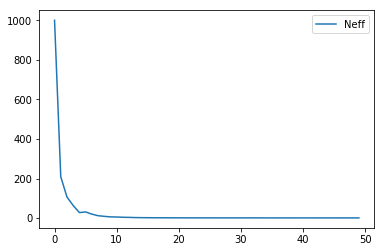

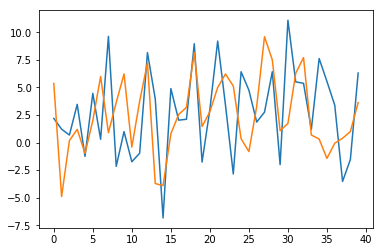

In [49]:
#SIS
t = 1460
N = 40
m = 1000
h = 0.05 
F = 8.0
#初期値
Xa = np.empty((N,m))
Xc = np.random.rand(N,m)
for j in range(500):
    Xb = Rungekutta4(Xc,h,F)
    Xc = Xb
Xa = Xb
#plt.plot(Xa[:,9])
#plt.plot(Xa[:,8])
#plt.show()

dataset = pd.read_csv("observation_data.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []
for i in range(1):
    a = 0
    sigma = 1.0*(i+1)
    for j in range(1):
        b = 1.08
        trPa = []
        trPf = []
        R = []
        Rf = []
        R_ = []
        RO = []
        Neff = []
        Wa = np.ones((N,m))/m
        neff = 1/(np.sum(Wa*Wa)/N)
        Neff.append(neff)
        
        #random walk
        dn = (np.random.randint(2,size=t)*2-1)*0.01
        p0=0
        swalk =np.cumsum(dn)+p0
        #pd.Series(swalk).plot()
        
        for k in range(t):
            y_=Y[k]
            
            Xf = Forecast(Xa,m,swalk[k])
            (Xa,Xa_,Wb) = Analysis(Xf,y_,m,Wa,sigma)
            Wa = Wb
            #print(Xf)
            neff = 1/(np.sum(Wa*Wa)/N)
            Neff.append(neff)
            
            rmse=np.zeros(m)
            rmsef = np.zeros(m)
            rmse_=0
            X1 = Xt[k]
            Y1 = Y[k]
            rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=0)/N)
            rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
            rmse_ = np.sqrt(np.sum((Xa_-X1)*(Xa_-X1))/N) 
            rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/N)
            #err = np.sqrt(np.sum(np.diag(Pa))/N)
            #err2 = np.sqrt(np.sum(np.diag(Pf))/N)
            #trPa.append(abs(err))
            #trPf.append(abs(err2))
            R.append(rmse)
            Rf.append(rmsef)
            R_.append(rmse_)
            RO.append(rmseo)
            
            #if(k%100==0):
             #   print(k)
        rb = np.sum(np.array(R_[500:]))/(t-500)
        #trPab = np.sum(np.array(trPa[500:]))/(t-500)
        #trPfb = np.sum(np.array(trPf[500:]))/(t-500)
        RMSE.append(rb)
        #TrPa.append(trPab)
        #TrPf.append(trPfb)
        A.append(sigma)
        #B.append(b)
        print(sigma,b)
#print(trPa)
#print(R)
#plt.plot(A,RMSE,label="RMSE")
#plt.plot(A,TrPa,label="trPa")
#plt.plot(A,TrPf,label="trPf")
#plt.xlabel("observation missing")
fname="SISm="+str(m)+".jpg"
tname="m="+str(m)
print(fname)
#plt.ylim([0.0,5.0])
plt.plot(R_[:50],label="RMSE")
plt.plot(RO[:50],label="ObservationRMSE")
#plt.plot(trPa,label="trPa")
#plt.plot(trPf,label="trPf")
plt.title(tname)
plt.legend()
#plt.savefig(fname)
plt.show()
print(np.mean(R_[500:]))
plt.plot(Neff[:50],label="Neff")
plt.legend()
fname="SISm="+str(m)+"Neff.jpg"
print(fname)
#plt.savefig(fname)
plt.show()
plt.plot(Xa_)
plt.plot(Xt[1459])
plt.show()
#df = pd.DataFrame(RMSE)
#df.to_csv("SRFB-localize.csv")

In [76]:
m=40
W=[2**i for i in range(1,m+1)]
W=W/np.sum(W)
print(W)
#print(W*W)
#print(np.sum(W*W))
#print(1/(np.sum(W*W)/10))

T=np.array([np.sum(W[:i]) for i in range(1,m+1)])
#T = np.array(T).T
print(T)

X=np.arange(m)
print(X)
Xa=np.empty(m)
for j in range(m):
    r=rand()
    print(r)
    Tr = (T-r).T
    Tr[Tr<0]= m
    Tr = Tr.tolist()
    print(Tr)
    k = Tr.index(min(Tr))
    Xa[j]=X[k]
print(Xa)

[9.09494702e-13 1.81898940e-12 3.63797881e-12 7.27595761e-12
 1.45519152e-11 2.91038305e-11 5.82076609e-11 1.16415322e-10
 2.32830644e-10 4.65661287e-10 9.31322575e-10 1.86264515e-09
 3.72529030e-09 7.45058060e-09 1.49011612e-08 2.98023224e-08
 5.96046448e-08 1.19209290e-07 2.38418579e-07 4.76837158e-07
 9.53674316e-07 1.90734863e-06 3.81469727e-06 7.62939453e-06
 1.52587891e-05 3.05175781e-05 6.10351563e-05 1.22070313e-04
 2.44140625e-04 4.88281250e-04 9.76562500e-04 1.95312500e-03
 3.90625000e-03 7.81250000e-03 1.56250000e-02 3.12500000e-02
 6.25000000e-02 1.25000000e-01 2.50000000e-01 5.00000000e-01]
[9.09494702e-13 2.72848411e-12 6.36646291e-12 1.36424205e-11
 2.81943358e-11 5.72981662e-11 1.15505827e-10 2.31921149e-10
 4.64751793e-10 9.30413080e-10 1.86173565e-09 3.72438080e-09
 7.44967110e-09 1.49002517e-08 2.98014129e-08 5.96037353e-08
 1.19208380e-07 2.38417670e-07 4.76836249e-07 9.53673407e-07
 1.90734772e-06 3.81469636e-06 7.62939362e-06 1.52587882e-05
 3.05175772e-05 6.10351

In [2]:
def resampling(X,W,m):
    T = np.array([np.sum(W[:i]) for i in range(1,m+1)])
    #print(T)
    Xa = np.empty(m)
    for j in range(m):
        r = rand()
        Tr = (T-r).T
        Tr[Tr<0]= m
        Tr = Tr.tolist()
        #print(Tr)
        k = Tr.index(min(Tr))
        Xa[j]=X[k]
    return Xa

In [3]:
def resampling_expand(X,W,m,sigma):
    T = np.array([np.sum(W[:i]) for i in range(1,m+1)])
    #print(T)
    Xa = np.empty(m)
    R=[]
    for j in range(m):
        r = rand()
        Tr = (T-r).T
        Tr[Tr<0]= m
        Tr = Tr.tolist()
        #print(Tr)
        k = Tr.index(min(Tr))
        Xa[j]=X[k] 
        R.append(random.normalvariate(0.0,sigma))
    R=np.array(R)
    Xa=Xa+R
    return Xa

SIRm=200_expand.jpg


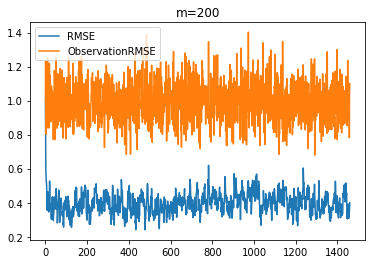

0.4021436242713382
SIRm=200Neff_expand.jpg


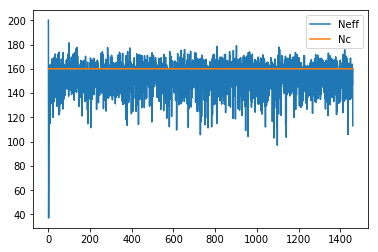

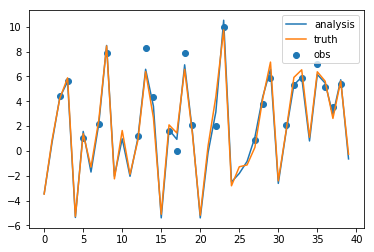

SIRm=200_random_abs_ncontour.jpg


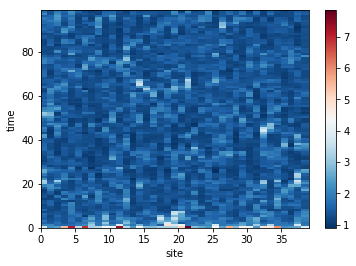

981
SIRNc200_random.jpg


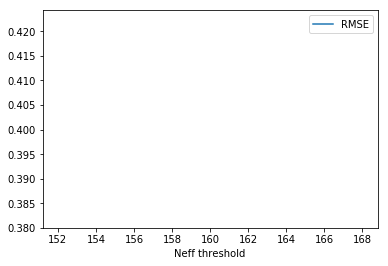

SIRscale200_random.jpg


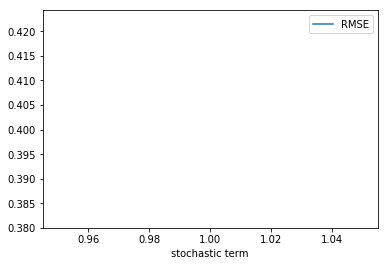

In [7]:
#SIR
def H(X,mask):
    return np.sqrt(X[mask]*X[mask])

def Analysis3(Xf,y,m,Wa,sigma):
    N = Xf.shape[0]
    R = np.eye(m)
    I = np.eye(N)
    
    mask = y>=0
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    y = y[mask]
    Xa = Xf
    W = np.exp(-(H(Xf,mask)-y.reshape(-1,1))**2/2*sigma*sigma)
    Wb = Wa
    Wb[mask] = Wa[mask]*W
    for i in range(N):
        Wb[i] = Wb[i]/np.sum(Wb[i])
    Xa_ = np.sum(Xa*Wa,axis=1)    
    Xa_[mask] = np.sum(Xa[mask]*Wb[mask],axis=1)
    
    
    return Xa,Xa_,Wb

t = 1460
N = 40
m = 200
h = 0.05 
F = 8.0


dataset = pd.read_csv("observation_data.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []
for i in range(1):
    
    sigma = 1.0
    sigma_ex = 0.3
    XA = []
    R = []
    Rf = []
    R_ = []
    RO = []
    Neff = []
    Th=[]
    
    #初期値
    Xa = (rand(N,m)-0.5)*20
    #Xc = np.random.rand(N,m)
    #for j in range(1000):
    #    Xb = Rungekutta4(Xc,h,F)
    #    Xc = Xb
    #Xa = Xb
    #rmse = np.sqrt(np.sum((Xa-Xt[0].reshape(-1,1))*(Xa-Xt[0].reshape(-1,1)),axis=0)/N)
    #R.append(rmse)
    #RO.append(1.0)
#plt.plot(Xa[:,9])
#plt.plot(Xa[:,8])
#plt.show()
    Wa = np.ones((N,m))/m
    neff = 1/(np.sum(Wa*Wa)/N)
    Neff.append(neff)
    Rnum=0
    
    #random walk
    dn = (np.random.randint(2,size=t*N*m)-0.5)*1.0
    dn=dn.reshape(t,N,m)
    #p0=np.zeros(N*m)
    #swalk =np.cumsum(dn,axis=0)+p0
    #swalk=swalk.reshape(t,N,m)
    #pd.Series(swalk).plot()
    B.append(0.2*(i+5))
    
    for k in range(t):
        y_=Y[k]
        
        #if(k<450):
        Nc = 0.8*m
        #else:
            #Nc = 0.2*m
        Th.append(Nc)
        Xf = Forecast(Xa,m)
        #Xf = Forecast_rnd(Xa,m,dn[k])
        (Xa,Xa_,Wb) = Analysis(Xf,y_,m,Wa,sigma)
        X = Xa
        Wa = Wb
           #print(Xf)
        neff = 1/(np.sum(Wa*Wa)/N)
        if(neff<Nc):
            for j in range(N):    
                #print(Xa[j].shape,X[j].shape,Wa[j].shape)
                #Xa[j] = resampling(X[j],Wa[j],m)
                Xa[j] = resampling_expand(X[j],Wa[j],m,sigma_ex)
            Wa = np.ones((N,m))/m
            Rnum=Rnum+1                
        Neff.append(neff)
        XA.append(Xa_)
            
        rmse=np.zeros(m)
        rmsef = np.zeros(m)
        rmse_=0
        X1 = Xt[k]
        Y1 = Y[k]
        mask = Y1>=0
        #Y1 = Y1[mask]
        rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=1)/N)
        rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
        rmse_ = np.sqrt(np.sum((Xa_-X1)*(Xa_-X1))/N) 
        rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/N)
            #err = np.sqrt(np.sum(np.diag(Pa))/N)
            #err2 = np.sqrt(np.sum(np.diag(Pf))/N)
            #trPa.append(abs(err))
            #trPf.append(abs(err2))
        R.append(rmse)
        Rf.append(rmsef)
        R_.append(rmse_)
        RO.append(rmseo)
            
            #if(k%100==0):
             #   print(k)
    fname="SIRm="+str(m)+"_expand.jpg"
    tname="m="+str(m)
    print(fname)
    plt.plot(R_,label="RMSE")
    plt.plot(RO,label="ObservationRMSE")
#plt.plot(trPa,label="trPa")
#plt.plot(trPf,label="trPf")
    plt.title(tname)
    plt.legend()
    plt.savefig(fname)
    plt.show()
    print(np.mean(R_[500:]))
    plt.plot(Neff,label="Neff")
    plt.plot(Th,label="Nc")
    plt.legend()
    fname="SIRm="+str(m)+"Neff_expand.jpg"
    print(fname)
    plt.savefig(fname)
    plt.show()
    plt.plot(XA[1200],label="analysis")
    plt.plot(Xt[1200],label="truth")
    Y1 = Y[1200]
    mask = Y1>=0
    Y1 = Y1[mask]
    site=np.arange(N)
    site=site[mask]
    plt.scatter(site,Y1,label="obs")
    plt.legend()
    #plt.savefig("SIRm="+str(m)+"compare_random_abs.jpg")
    plt.show()
    fname="SIRm="+str(m)+"_random_abs_ncontour.jpg"
    print(fname)
    xs=np.arange(N)
    time=np.arange(100)
    Rmse = np.array(R).reshape(t,N)
    plt.pcolor(xs,time,Rmse[:100],cmap='RdBu_r')
    plt.colorbar()
    plt.xlabel('site')
    plt.ylabel('time')
    #plt.savefig(fname)
    plt.show()
    
    rb = np.sum(np.array(R_[500:]))/(t-500)
        #trPab = np.sum(np.array(trPa[500:]))/(t-500)
        #trPfb = np.sum(np.array(trPf[500:]))/(t-500)
    RMSE.append(rb)
        #TrPa.append(trPab)
        #TrPf.append(trPfb)
    A.append(Nc)
    #B.append(sigma_ex)
    #print(sigma_ex)
    print(Rnum)

fname="SIRNc"+str(m)+"_random.jpg"
print(fname)
plt.plot(A,RMSE,label="RMSE")
plt.xlabel("Neff threshold")
plt.legend()
#plt.savefig(fname)
plt.show()

fname="SIRscale"+str(m)+"_random.jpg"
print(fname)
plt.plot(B,RMSE,label="RMSE")
plt.xlabel("stochastic term")
plt.legend()
#plt.savefig(fname)
plt.show()

In [17]:
print(RMSE)

[4.36617142964908, 2.4915002990370803, 0.6974640142206928, 0.4130038464072463, 0.40441241043446063, 0.4050148934639243, 0.41785923853031487, 0.43504990488856293, 0.4501036779782624, 0.46316737733746005]


(10, 5)


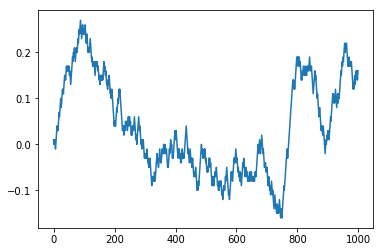

In [62]:
#random walk
dn = (np.random.randint(2,size=1000*10*5)*2-1)*0.01
dn = dn.reshape(1000,10,5)
p0=np.zeros((10,5))
swalk =np.cumsum(dn,axis=0)+p0
print(swalk[0].shape)
pd.Series(swalk[:,0,1]).plot()

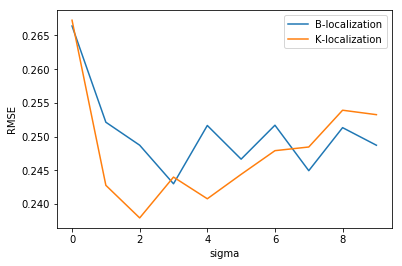

In [16]:
df1 = pd.read_csv("SRFB-localize.csv")
df2 = pd.read_csv("SRFK-localize.csv")
rmseB = df1.values
rmseK = df2.values
RB = rmseB[:,1]
RK = rmseK[:,1]
t = np.arange(1460)
plt.plot(RB,label="B-localization")
plt.plot(RK,label="K-localization")
plt.xlabel("sigma")
plt.ylabel("RMSE")
plt.legend()
plt.show()

(25, 2)
[[2.96345313 0.34794413 0.37534145 0.40860369 0.44439498]
 [2.32341121 0.33429019 0.37260342 0.39946916 0.43547068]
 [2.43593192 0.33502115 0.36237574 0.39437344 0.43092426]
 [2.95925046 0.33142383 0.36800126 0.39224439 0.42730161]
 [3.20994702 0.34047314 0.36556954 0.39673873 0.42643392]]


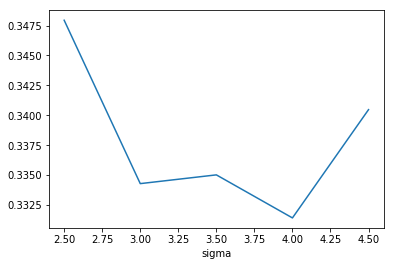

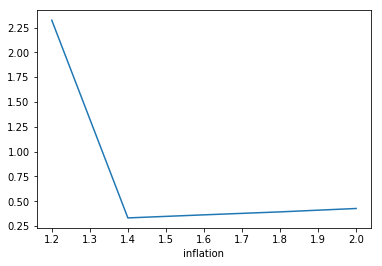

In [27]:
df=pd.read_csv("SRFm=10.csv")
rmse=df.values
print(rmse.shape)
R = rmse[:,1].reshape(5,5)
print(R)
y = [2.0+0.5*(i+1) for i in range(5)]
x = [1.0+0.2*(j+1) for j in range(5)]
Rsigma=[min(R[i,:]) for i in range(5)]
plt.plot(y,Rsigma)
plt.xlabel("sigma")
plt.show()
Rbeta = [min(R[:,i]) for i in range(5)]
plt.plot(x,Rbeta)
plt.xlabel("inflation")
plt.show()

0.35456417004836976


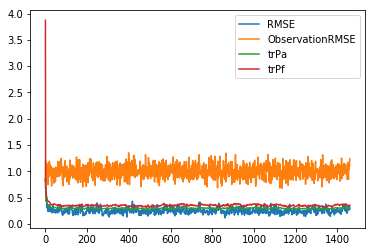

In [7]:
print(np.mean(R[500:]))
plt.plot(R_,label="RMSE")
plt.plot(RO,label="ObservationRMSE")
plt.plot(trPa,label="trPa")
plt.plot(trPf,label="trPf")
plt.legend()
#plt.savefig("SRF.jpg")
plt.show()

In [9]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import random
import pandas as pd
import csv


# EnSRF



def L96(Xa,F):
    
    F_ = (np.roll(Xa, -1,axis=0) - np.roll(Xa, 2,axis=0)) * np.roll(Xa, 1,axis=0) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb
def Forecast(Xa,m,b):
    h = 0.05 
    F = 8.0
    
    
    Xf = np.zeros((N,m))
    Xf = Rungekutta4(Xa,h,F)
    #print(Xf)
    Xf_ = np.sum(Xf,axis=1)/m
    #print(Xf_.shape)
    dXf = Xf - Xf_.reshape(-1,1)
    dXf = dXf*b
    #Zf = dXf*b/np.sqrt(m-1)
    #print(dXf)
    Pf = dXf@dXf.T/(m-1)
    
    return Xf,Pf,dXf,Xf_

def Analysis(Xf,Pf,dXf,Xf_,y,m,a,loc):
    N = 40
    p = N-a
    H = np.identity(N)
    H = np.delete(H,loc,axis=0) #観測行列
    R = np.eye(p)
    I = np.eye(N)
    
    D=np.empty((N,N))
    L=np.empty((N,N))
    obs=np.arange(N)
    obs=np.delete(obs,loc)
    for s in range(N):
        for u in range(N):
            D[s,u] = min(abs(s-u),N-abs(s-u))
    d0 = 2*np.sqrt(10/3)*sigma
    r0 = np.exp(-d0**2/(2*sigma**2))
    L = np.exp(-D**2/(2*sigma**2))
    L[L<r0]=0
    
    P0 = Pf
    dX0 = dXf
    X0_ = Xf_
    for i in range(p):
        H_ = np.reshape(H[i,:],(1,-1))
        #V1 = (H_ @ Z0).T
        D1 = H_ @ P0 @ H_.T+R[i,i]
        #print(D1)
        K1 = P0 @ H_.T @ np.linalg.inv(D1)
        K1_ = K1/(1+np.sqrt(R[i,i]/D1))
        K1_ = K1_.reshape(-1,1)
        Xa_ = X0_+K1 @ (y[i]-H_@X0_) 
        K_H = K1_ @ H_
        dXa = (I - K_H) @ dX0
        Pa = dX0@dX0.T/(m-1)
        Pa = Pa*L
        
        X0_ = Xa_
        dX0 = dXa
        P0 = Pa
        
    Xa = np.zeros((N,m))
    Xa = dXa + Xa_.reshape(-1,1)
    
    
    return Xa,Pa,Xa_



2.0 1.1


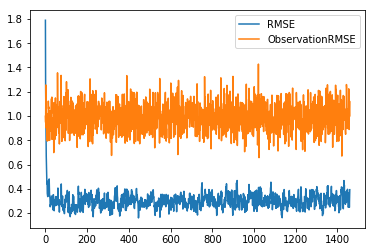

[0.3011791446609486]


In [10]:

t = 1460
N = 40
m = 10
h = 0.05 
F = 8.0
#初期値
Xa = np.zeros((N,m))
Xc = np.random.rand(N,m)
for j in range(500):
    Xb = Rungekutta4(Xc,h,F)
    Xc = Xb
Xa = Xb
#plt.plot(Xa[:,9])
#plt.plot(Xa[:,8])
#plt.show()

dataset = pd.read_csv("observation_data.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []
for i in range(1):
    a = 0
    sigma = 2.0
    for j in range(1):
        b = 1.1
        trPa = []
        trPf = []
        R = []
        Rf = []
        R_ = []
        RO = []
        for k in range(t):
            loc = np.random.choice(N,a,replace=False)
            loc.sort() 
            y = np.delete(Y[k],loc)
            
            (Xf,Pf,Zf,Xf_) = Forecast(Xa,m,b)
            (Xa,Pa,Xa_) = Analysis(Xf,Pf,Zf,Xf_,y,m,a,loc)
            #print(Xf)
    
            rmse=np.zeros(m)
            rmsef = np.zeros(m)
            rmse_=0
            X1 = Xt[k]
            Y1 = Y[k]
            rmse = np.sum((Xa-X1.reshape(-1,1))**2,axis=0)
            rmsef = np.sum((Xf-X1.reshape(-1,1))**2,axis=0)
            rmse_ = np.sum((Xa_-X1)*(Xa_-X1)) 
            rmseo = np.sum((Y1-X1)*(Y1-X1))
            rmse = np.sqrt(rmse/N)
            rmsef = np.sqrt(rmsef/N)
            rmse_ = np.sqrt(rmse_/N)
            rmseo = np.sqrt(rmseo/N)
            err = 0
            err2 = 0
            err = np.sqrt(np.sum(np.diag(Pa))/N)
            err2 = np.sqrt(np.sum(np.diag(Pf))/N)
            trPa.append(abs(err))
            trPf.append(abs(err2))
            R.append(rmse)
            Rf.append(rmsef)
            R_.append(rmse_)
            RO.append(rmseo)
            #if(k%100==0):
             #   print(k)
        rb = np.sum(np.array(R_[500:]))/(t-500)
        trPab = np.sum(np.array(trPa[500:]))/(t-500)
        trPfb = np.sum(np.array(trPf[500:]))/(t-500)
        RMSE.append(rb)
        TrPa.append(trPab)
        TrPf.append(trPfb)
        A.append(sigma)
        B.append(b)
        print(sigma,b)
#print(trPa)
#print(R)
#plt.plot(A,RMSE,label="RMSE")
#plt.plot(A,TrPa,label="trPa")
#plt.plot(A,TrPf,label="trPf")
#plt.xlabel("observation missing")
plt.plot(R_,label="RMSE")
plt.plot(RO,label="ObservationRMSE")
plt.plot(trPa,label="trPa")
plt.plot(trPf,label="trPf")
plt.legend()
#plt.savefig("SRF.jpg")
plt.show()
print(RMSE)
#df = pd.DataFrame(RMSE)
#df.to_csv("SRFlocalize.csv")

In [6]:
print(rand(10).shape)
H = np.array([1,0,0,0,0,0,0,1,0,0,0,0,0,0,1]).reshape(3,5)
Zf=np.array([2,1,0,0,0,3,2,1,0,0]).reshape(5,2)
print(Zf)
H_=np.reshape(H[1,:],(1,-1))
print(H_)
V = (H_ @ Zf ).T
print(V)
D = V.T @ V +1
print(D)
K = Zf @ V/(D+np.sqrt(D))
print(K)
K_ = np.empty((5,0))
for i in range(3):
    K_ = np.append(K_,K,axis=1)
print(K_)

(10,)
[[2 1]
 [0 0]
 [0 3]
 [2 1]
 [0 0]]
[[0 0 1 0 0]]
[[0]
 [3]]
[[10]]
[[0.22792408]
 [0.        ]
 [0.68377223]
 [0.22792408]
 [0.        ]]
[[0.22792408 0.22792408 0.22792408]
 [0.         0.         0.        ]
 [0.68377223 0.68377223 0.68377223]
 [0.22792408 0.22792408 0.22792408]
 [0.         0.         0.        ]]


In [84]:
#LETKF
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import random
import pandas as pd
import csv



def L96(Xa,F):
    
    F_ = (np.roll(Xa, -1,axis=0) - np.roll(Xa, 2,axis=0)) * np.roll(Xa, 1,axis=0) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb
def Forecast(Xa,m):
    h = 0.05 
    F = 8.0
    
    
    Xf = np.zeros((N,m))
    Xf = Rungekutta4(Xa,h,F)
    #print(Xf)
    Xf_ = np.sum(Xf,axis=1)/m
    #print(Xf_.shape)
    dXf = Xf - Xf_.reshape(-1,1)
    #print(dXf)
    Pf = dXf @ dXf.T/(m-1)
    #Pf = Pf*L
    
    return Xf,Pf,dXf,Xf_

def Analysis(dXf,Xf_,y,m,a,loc,rho,sigma):
    N = 40
    p = N-a
    H = np.identity(N)
    H = np.delete(H,loc,axis=0) #観測行列
    R = np.eye(p)
    I = np.eye(m)

    obs=np.arange(N)
    obs=np.delete(obs,loc)
    D = np.zeros((N,p))
    for s in range(N):
        for u in range(p):
            D[s,u] = min(abs(s-obs[u]),N-abs(s-obs[u]))
    #print(obs)
    Xa = np.zeros((N,m))
    Xa_ = np.zeros(N)
    dXa = np.zeros((N,m))
    #使う値は前後10点に限定
    for i in range(N):
        d = D[i]
        far = np.arange(p)
        far = far[d>2*np.sqrt(10/3)*sigma]
        yi = y
        Hi = H
        Ri = R
        yi = np.delete(yi,far)
        Hi = np.delete(Hi,far,axis=0)
        Ri = np.delete(Ri,far,axis=0)
        Ri = np.delete(Ri,far,axis=1)
        #print(yi.shape,Hi.shape,Ri.shape)
        diagR = np.diag(Ri)
        di = yi - Hi @ Xf_
        dYi = Hi @ dXf
        L = np.exp(-d**2/(2*sigma**2))
        L = np.delete(L,far)
        #Ri = np.diag(diagR/L)
        R_inv = np.linalg.inv(Ri)
    
        A = (m-1)*I/rho + dYi.T @ R_inv @ dYi
        la,v = np.linalg.eigh(A) #eigenvalue decomposition
        D_inv = np.linalg.inv(np.diag(la))
        U = np.array(v).reshape(m,m)
        Pa_ = U @ D_inv @ U.T #UD^(-1)UT
        #print(Pa_)
    
        Xa_[i] = Xf_[i] + dXf[i,:] @ Pa_ @ dYi.T @ R_inv @ di 
        Pa_root = U @ np.sqrt(D_inv) @ U.T
        Pa_root = Pa_root * np.sqrt(m-1)
        dXa[i,:] = dXf[i,:] @ Pa_root
        Xa[i,:] = np.full(m,Xa_[i]) + dXa[i,:]
            
    #print("Xa_",Xa_)
    #print("dXa",dXa)
    #print("Xa",Xa)
    Pa = dXa @ dXa.T/(m-1)
    
    return Xa,Pa,Xa_

2.0 1.03


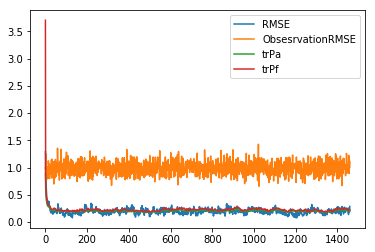

0.19506306578435595


In [86]:

t = 1460
N = 40
m = 20
h = 0.05 
F = 8.0
#初期値
Xa = np.zeros((N,m))
Xc = np.random.rand(N,m)
for j in range(500):
    Xb = Rungekutta4(Xc,h,F)
    Xc = Xb
Xa = Xb
#plt.plot(Xa[:,9])
#plt.plot(Xa[:,8])
#plt.show()

dataset = pd.read_csv("observation_data.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []
for i in range(1):
    a = 0
    sigma = 2.0
    for j in range(1):
        rho = 1.03
        trPa = []
        trPf = []
        R = []
        Rf = []
        R_ = []
        RO = []
        for k in range(t):
            loc = np.random.choice(N,a,replace=False)
            loc.sort() 
            y = np.delete(Y[k],loc)
            
            (Xf,Pf,dXf,Xf_) = Forecast(Xa,m)
            (Xa,Pa,Xa_) = Analysis(dXf,Xf_,y,m,a,loc,rho,sigma)
            #print(Xf)
    
            rmse=np.zeros(m)
            rmsef = np.zeros(m)
            rmse_=0
            X1 = Xt[k,:]
            Y1 = Y[k,:]
            rmse = np.sum((Xa-X1.reshape(-1,1))**2)
            rmsef = np.sum((Xf-X1.reshape(-1,1))**2)
            rmse_ = np.sum((Xa_-X1)*(Xa_-X1)) 
            rmseo = np.sum((Y1-X1)*(Y1-X1))
            rmse = np.sqrt(rmse/N)
            rmsef = np.sqrt(rmsef/N)
            rmse_ = np.sqrt(rmse_/N)
            rmseo = np.sqrt(rmseo/N)
            err = 0
            err2 = 0
            err = np.sqrt(np.sum(np.diag(Pa))/N)
            err2 = np.sqrt(np.sum(np.diag(Pf))/N)
            trPa.append(abs(err))
            trPf.append(abs(err2))
            R.append(rmse)
            Rf.append(rmsef)
            R_.append(rmse_)
            RO.append(rmseo)
            #if(k%100==0):
             #   print(k)
        rb = np.sum(np.array(R_[500:]))/(t-500)
        trPab = np.sum(np.array(trPa[500:]))/(t-500)
        trPfb = np.sum(np.array(trPf[500:]))/(t-500)
        RMSE.append(rb)
        TrPa.append(trPab)
        TrPf.append(trPfb)
        A.append(sigma)
        B.append(rho)
        print(sigma,rho)
#print(trPa)
#print(R)
#plt.plot(A,RMSE,label="RMSE")
#plt.plot(A,TrPa,label="trPa")
#plt.plot(A,TrPf,label="trPf")
#plt.xlabel("observation missing")
plt.plot(R_,label="RMSE")
plt.plot(RO,label="ObsesrvationRMSE")
plt.plot(trPa,label="trPa")
plt.plot(trPf,label="trPf")
plt.legend()
#plt.savefig("SRF.jpg")
plt.show()
print(np.mean(R_[500:]))
df = pd.DataFrame(RMSE)
#df.to_csv("LETKF.csv")

(10, 2)
[[0.24178265]
 [0.2077035 ]
 [0.19633374]
 [0.19442681]
 [2.75710827]
 [2.7490539 ]
 [2.72016642]
 [2.79781939]
 [3.52585615]
 [0.19211786]]


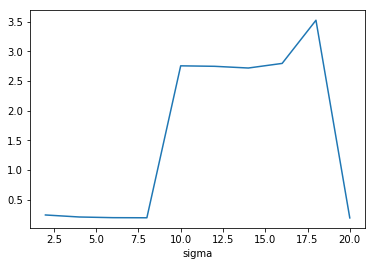

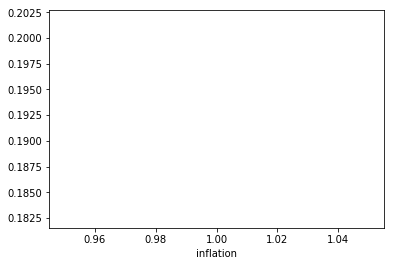

In [7]:
df=pd.read_csv("LETKF.csv")
rmse=df.values
print(rmse.shape)
R = rmse[:,1].reshape(10,1)
print(R)
x=[1.0+0.01*(j) for j in range(1)]
y = [2.0*(i+1) for i in range(10)]
Rsigma=[min(R[i,:]) for i in range(10)]
plt.plot(y,Rsigma)
plt.xlabel("sigma")
plt.show()
Rbeta = [min(R[:,i]) for i in range(1)]
plt.plot(x,Rbeta)
plt.xlabel("inflation")
plt.show()

(11,)


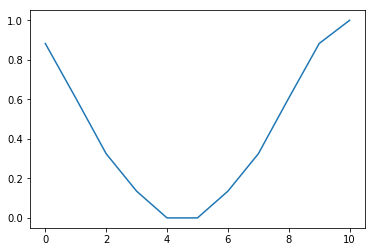

In [15]:
print(L.shape)
plt.plot(L)
plt.show()

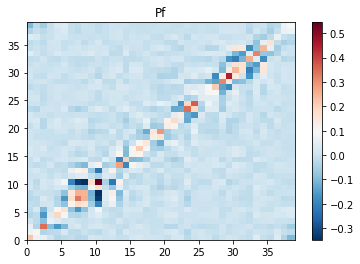

In [46]:
x = np.arange(40)
y = np.arange(40)
plt.pcolor(x,y,Pf,cmap='RdBu_r')
plt.colorbar()
plt.title("Pf")
plt.show()

[13 14 20 23 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 15 16 17 18 19 21 22 24 25 26 28
 29 30 31 32 33 34 35 36 37 38 39]
[[0. 1. 2. ... 3. 2. 1.]
 [1. 0. 1. ... 4. 3. 2.]
 [2. 1. 0. ... 5. 4. 3.]
 ...
 [3. 4. 5. ... 0. 1. 2.]
 [2. 3. 4. ... 1. 0. 1.]
 [1. 2. 3. ... 2. 1. 0.]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[6. 7. 8. ... 8. 7. 6.]
[[1.         0.45783336 0.04393693 ... 0.         0.04393693 0.45783336]
 [0.45783336 1.         0.45783336 ... 0.         0.         0.04393693]
 [0.04393693 0.45783336 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.45783336 0.04393693]
 [0.04393693 0.         0.         ... 0.45783336 1.         0.45783336]
 [0.45783336 0.04393693 0.         ... 0.04393693 0.45783336 

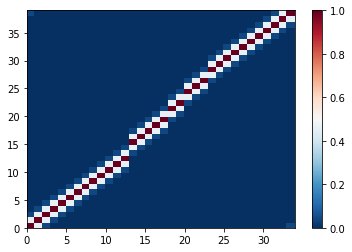

In [40]:
N=40
a=5
p=N-a
sigma=0.8
D = np.zeros((N,p))
L = np.zeros((N,p))
loc = np.random.choice(N,a,replace=False)
loc.sort()
print(loc)
r=0
obs=np.arange(N)
obs=np.delete(obs,loc)
print(obs)
for s in range(N):
    for u in range(N-a):
        D[s,u] = min(abs(s-obs[u]),N-abs(s-obs[u]))
print(D)        
A=D>5
print(A)
print(D[A])
d0=2*np.sqrt(10/3)*sigma
r0=np.exp(-d0**2/(2*sigma**2))
L=np.exp(-D**2/(2*sigma**2))
L[L<r0]=0
x=np.arange(p)
y=np.arange(N)
#P = L*Pf
print(L)
plt.pcolor(x,y,L,cmap='RdBu_r')
plt.colorbar()
#plt.title("L*Pf")
#plt.show()

#L2 = np.exp(-D/2)
#print(L2*L2)
#dX = L2*dXf
#P2 = dX @ dX.T/(m-1)
#print(P2)

In [13]:
#adaptive inflation
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import random
import pandas as pd
import csv


# ETKF



def L96(Xa,F):
   
    F_ = (np.roll(Xa, -1, axis=0) - np.roll(Xa, 2, axis=0)) * np.roll(Xa, 1, axis=0) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb
def Forecast(Xa,y,m,a,A):
    h = 0.05 
    F = 8.0
    b = 0.01
    
    N = 40
    p = N-a
    H = np.identity(N)
    H = np.delete(H,loc,axis=0) #観測行列
    R = np.eye(p)
    I = np.eye(N)
    
    Xf = np.zeros((N,m))
    Xf = Rungekutta4(Xa,h,F)
    #print(Xf)
    Xf_ = np.sum(Xf,axis=1)/m
    #print(Xf_.shape)
    dXf = Xf - Xf_.reshape(-1,1)
    Pf = dXf @ dXf.T/(m-1)
    
    #d = np.zeros((p,m))
    #for k in range(m):
    #    d[:,k] = y - H @ Xf[:,k]
    #d_ = np.sum(d,axis=1)/m
    #do = [d[:,k]-d_ for k in range(m)]
    #dob = np.array(do).reshape(m,p).T
    #B = dob @ dob.T/(m-1)
    
    d = y - H @ Xf_
    do = d.reshape(-1,1)
    trPf = np.sum(np.diag(H @ Pf @ H.T))
    trB = np.sum(np.diag(do @ do.T))
    trR = np.sum(np.diag(R))
    
    alpha_ = (trB-trR)/trPf
    #print(alpha_)
    alpha = b*alpha_+(1-b)*A
    dXf = dXf*np.sqrt(alpha)
    
    return Xf,Pf,dXf,Xf_,alpha

def Analysis(Xf,Pf,dXf,Xf_,y,m,a,loc,L):
    N = 40
    p = N-a
    H = np.identity(N)
    H = np.delete(H,loc,axis=0) #観測行列
    R = np.eye(p)
    I = np.eye(N)
    
    dY = H @ dXf
    #カルマンゲインの導出
    A = dY @ dY.T + (m-1)*R
    A_inv = np.linalg.inv(A)
    K = dXf @ dY.T @ A_inv
    K = L*K
    
    Xa_ = Xf_ + K @ (y - H @ Xf_)
    E = np.eye(m)
    TT = E - dY.T @ A_inv @ dY
    #print(TT)
    
    la,v = np.linalg.eig(TT)
    #print(v)
    D = np.diag(np.sqrt(la))
    #print(D)
    U = np.array(v).reshape(m,m)
    Q,R_=np.linalg.qr(U)
    
    T = Q @ D
    #print(T @ T.T)
    dXa = dXf @ T
    Xa = np.zeros((N,m))
    Xa = dXa + Xa_.reshape(-1,1)
    
    Pa = dXa @ dXa.T/(m-1)
    
    return Xa,Pa,Xa_



1.5 1.9948832065535584


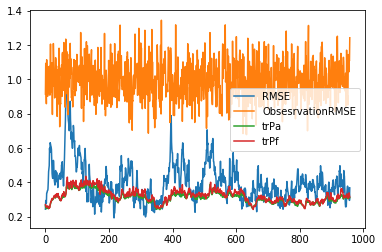

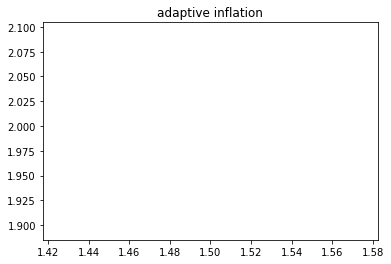

In [14]:

t = 1460
N = 40
m = 10
h = 0.01 
F = 8.0
#初期値
Xa = np.zeros((N,m))
Xc = np.random.rand(N,m)
for j in range(200):
    Xb = Rungekutta4(Xc,h,F)
    Xc = Xb
Xa = Xb
#plt.plot(Xa[:,9])
#plt.plot(Xa[:,8])
#plt.show()

dataset = pd.read_csv("observation_data.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
S = []
A_=[]
for j in range(1):
    a = 5
    sigma = 1.5
    trPa = []
    trPf = []
    R = []
    Rf = []
    R_ = []
    RO = []
    A=[]
    A.append(1.0)
    for k in range(t):
        loc = np.random.choice(N,a,replace=False)
        loc.sort() 
        y = np.delete(Y[k],loc)
        D=np.zeros((N,N-a))
        L=np.zeros((N,N-a))
        obs=np.arange(N)
        obs = np.delete(obs,loc)
        for s in range(N):
            for u in range(N-a):
                D[s,u] = min(abs(s-obs[u]),N-abs(s-obs[u]))
        d0 = 2*np.sqrt(10/3)*sigma
        r0 = np.exp(-d0**2/(2*sigma**2))
        L = np.exp(-D**2/(2*sigma**2))
        L[L<r0] = 0
        #print(L)
        (Xf,Pf,dXf,Xf_,alpha) = Forecast(Xa,y,m,a,A[-1])
        (Xa,Pa,Xa_) = Analysis(Xf,Pf,dXf,Xf_,y,m,a,loc,L)
        A.append(alpha)
        #print(Xf)
        
        if(k>500):
            rmse=np.zeros(m)
            rmsef = np.zeros(m)
            rmse_=0
            X1 = Xt[k,:]
            Y1 = Y[k,:]
            rmse = np.sum((Xa-X1.reshape(-1,1))**2,axis=1)
            rmsef = np.sum((Xf-X1.reshape(-1,1))**2,axis=1)
            rmse_ = np.sum((Xa_-X1)*(Xa_-X1)) 
            rmseo = np.sum((Y1-X1)*(Y1-X1))
            rmse = np.sqrt(rmse/N)
            rmsef = np.sqrt(rmsef/N)
            rmse_ = np.sqrt(rmse_/N)
            rmseo = np.sqrt(rmseo/N)
            err = 0
            err2 = 0
            err = np.sqrt(np.sum(np.diag(Pa))/N)
            err2 = np.sqrt(np.sum(np.diag(Pf))/N)
            trPa.append(abs(err))
            trPf.append(abs(err2))
            R.append(rmse)
            Rf.append(rmsef)
            R_.append(rmse_)
            RO.append(rmseo)
            #if(k%100==0):
             #   print(k)
    rb = np.sum(np.array(R_))/(t-500)
    trPab = np.sum(np.array(trPa))/(t-500)
    trPfb = np.sum(np.array(trPf))/(t-500)
    alpha_=np.sum(np.array(A))/(t)
    RMSE.append(rb)
    TrPa.append(trPab)
    TrPf.append(trPfb)
    A_.append(alpha_)
    S.append(sigma)
    print(sigma,alpha_)
#print(trPa)
#print(R_)
#KF = np.ones(np.array(S).size)*0.221851
#plt.plot(S,RMSE,label="RMSE")
#plt.plot(S,TrPa,label="trPa")
#plt.plot(S,TrPf,label="trPf")
#plt.plot(S,KF,label="KF")
#plt.xlabel("sigma")
#plt.title("SRF,m=10")
plt.plot(R_,label="RMSE")
plt.plot(RO,label="ObsesrvationRMSE")
plt.plot(trPa,label="trPa")
plt.plot(trPf,label="trPf")
plt.legend()
#plt.savefig("SRFm=10.jpg")
plt.show()
plt.plot(S,A_)
plt.title("adaptive inflation")
#plt.savefig("SRFalpham=10")
plt.show()

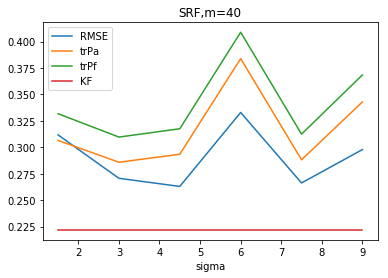

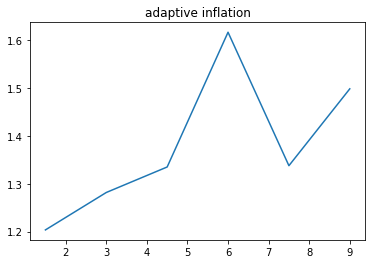

In [20]:
KF = np.ones(np.array(S).size)*0.221851
plt.plot(S,RMSE,label="RMSE")
plt.plot(S,TrPa,label="trPa")
plt.plot(S,TrPf,label="trPf")
plt.plot(S,KF,label="KF")
plt.xlabel("sigma")
plt.title("SRF,m=40")
#plt.plot(R_,label="RMSE")
#plt.plot(RO,label="ObsesrvationRMSE")
#plt.plot(trPa,label="trPa")
#plt.plot(trPf,label="trPf")
plt.legend()
plt.savefig("SRFm=40_2.jpg")
plt.show()
plt.plot(S,A_)
plt.title("adaptive inflation")
plt.savefig("SRFalpham=40_2")
plt.show()

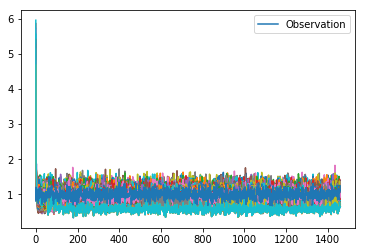

In [7]:
RMSE = np.array(R).reshape(t,m)
RMSEf = np.array(Rf).reshape(t,m)
for i in range(m):
    #plt.plot(RMSE[:,i])
    plt.plot(RMSEf[:,i])
plt.plot(RO,label="Observation")
plt.legend()
plt.show()

1.5 0.8
1.6 0.8
1.7 0.8
1.8 0.8
1.9 0.8


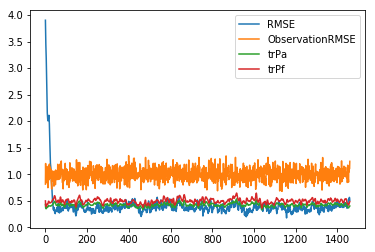

0.3724248669666783


In [45]:
#POsystem
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import random
import pandas as pd
import csv

def L96(Xa,F):
    
    F_ = (np.roll(Xa, -1, axis=0) - np.roll(Xa, 2, axis=0)) * np.roll(Xa, 1, axis=0) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb
def Forecast(Xa,y,m,a,A,L):
    h = 0.05 
    F = 8.0
    N = 40
    b = 0.01
    p = N-a
    H = np.identity(N)
    H = np.delete(H,loc,axis=0) #観測行列
    R = np.eye(p)
    I = np.eye(N)
    
    Xf = np.zeros((N,m))
    Xf = Rungekutta4(Xa,h,F)
    #print(Xf)
    Xf_ = np.sum(Xf,axis=1)/m
    #print(Xf_.shape)
    dXf = Xf - Xf_.reshape(-1,1)
    dXf = dXf*A
    #print(dXf)
    Pf = dXf @ dXf.T/(m-1)
    #Pf = Pf*L
    
    d = y - H @ Xf_
    do = d[:,np.newaxis]
    trPf = np.sum(np.diag(H @ Pf @ H.T))
    trB = np.sum(np.diag(do @ do.T))
    trR = np.sum(np.diag(R))
    
    alpha_ = (trB-trR)/trPf
    #print(alpha_)
    alpha = b*alpha_+(1-b)*A
    #dXf = dXf*np.sqrt(alpha)
    #Pf = Pf * alpha
    
    return Xf,Pf,dXf,Xf_,alpha

def Analysis(Xf,Pf,dXf,Xf_,y,EO,m,a,loc,L):
    N = 40
    p = N-a
    H = np.identity(N)
    H = np.delete(H,loc,axis=0) #観測行列
    R = np.eye(p)
    I = np.eye(N)
    
    Y = np.zeros((p,m))
    Y = y.reshape(-1,1) + EO
    #dY = H @ dXf
    #カルマンゲインの導出
    K = Pf @ H.T @ np.linalg.inv(H @ Pf @ H.T + R)
    K = K*L
    
    Xa = Xf + K @ (Y - H @ Xf)
    Xa_ = Xf_ + K @ (y - H @ Xf_)
    Pa = (I - K @ H)@ Pf
    
    return Xa,Xa_,Pa


t = 1460
N = 40
m = 10
h = 0.01 
F = 8.0
#初期値
Xa = np.zeros((N,m))
Xc = np.random.rand(N,m)
for j in range(500):
    Xb = Rungekutta4(Xc,h,F)
    Xc = Xb
Xa = Xb
#plt.plot(Xa[:,39])
#plt.plot(Xa[:,38])
#plt.show()

a = 0
dataset = pd.read_csv("observation_data.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
B = []
A_=[]
for i in range(5):
    sigma = 1.5+0.1*i
    for j in range(1):
        b = 0.8
        mu = np.zeros(N-a)
        sigma2 = np.eye(N-a)
        EO = multivariate_normal(mu,sigma2,m).T
        #print(EO.shape)
        trPa = []
        trPf = []
        R = []
        Rf = []
        R_ = []
        RO = []
        A=[]
        #A.append(1.0)
        for k in range(t):
            loc = np.random.choice(N,a,replace=False)
            y = np.delete(Y[k],loc)
            D=np.zeros((N,N-a))
            L=np.zeros((N,N-a))
            obs=np.arange(N)
            obs=np.delete(obs,loc)
            for s in range(N):
                for u in range(N-a):
                    D[s,u] = min(abs(s-u),N-abs(s-u))
            d0=2*np.sqrt(10/3)*sigma
            r0=np.exp(-d0**2/(2*sigma**2))
            L = np.exp(-D**2/(2*sigma**2))
            L[L<r0]=0
        
            #(Xf,Pf,dXf,Xf_,alpha) = Forecast(Xa,y,m,a,A[-1],L)
            (Xf,Pf,dXf,Xf_,alpha) = Forecast(Xa,y,m,a,b,L)
            (Xa,Xa_,Pa) = Analysis(Xf,Pf,dXf,Xf_,y,EO,m,a,loc,L)
            A.append(alpha)
    
            rmse=np.zeros(m)
            rmsef = np.zeros(m)
            rmse_=0
            X1 = Xt[k,:]
            Y1 = Y[k,:]
            rmse = np.sum((Xa-X1.reshape(-1,1))**2)
            rmsef = np.sum((Xf-X1.reshape(-1,1))**2)
            rmse_ = np.sum((Xa_-X1)*(Xa_-X1)) 
            rmseo = np.sum((Y1-X1)*(Y1-X1))
            rmse = np.sqrt(rmse/N)
            rmsef = np.sqrt(rmsef/N)
            rmse_ = np.sqrt(rmse_/N)
            rmseo = np.sqrt(rmseo/N)
            err = 0
            err2 = 0
            err = np.sqrt(np.sum(np.diag(Pa))/N)
            err2 = np.sqrt(np.sum(np.diag(Pf))/N)
            trPa.append(abs(err))
            trPf.append(abs(err2))
            R.append(rmse)
            Rf.append(rmsef)
            R_.append(rmse_)
            RO.append(rmseo)
            #if(k%100==0):
                #print(k)
        rb = np.sum(np.array(R_[500:]))/(t-500)
        trPab = np.sum(np.array(trPa[500:]))/(t-500)
        trPfb = np.sum(np.array(trPf[500:]))/(t-500)
        alpha_=np.sum(np.array(A))/1460
        RMSE.append(rb)
        TrPa.append(trPab)
        TrPf.append(trPfb)
        A_.append(b)
        B.append(sigma)
    print(sigma,b)
#print(trPa)
#print(R)
#KF = np.ones(np.array(B).size)*0.221851
#plt.plot(B,RMSE,label="RMSE")
#plt.plot(B,TrPa,label="trPa")
#plt.plot(B,TrPf,label="trPf")
#plt.plot(B,KF,label="KF")
#plt.xlabel("sigma")
#plt.title("PO,m=10")
#plt.legend()
#plt.savefig("POm=40.jpg")
#plt.show()

#plt.plot(B,A_)
#plt.title("PO,adaptive inflation")
#plt.xlabel("sigma")
#plt.savefig("POm=40alpha.jpg")
#plt.show()

plt.plot(R_,label="RMSE")
plt.plot(RO,label="ObservationRMSE")
plt.plot(trPa,label="trPa")
plt.plot(trPf,label="trPf")
plt.legend()
#plt.savefig("PO.jpg")
plt.show()
print(np.mean(R_[500:]))
df = pd.DataFrame(RMSE)
df.to_csv("PO.csv")

(5, 2)
[[0.39281353]
 [0.3670826 ]
 [0.3573747 ]
 [0.35876277]
 [0.37242487]]


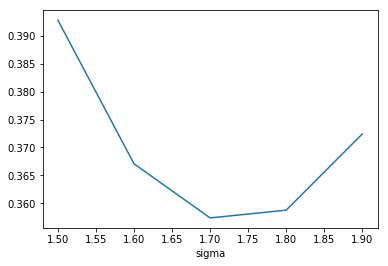

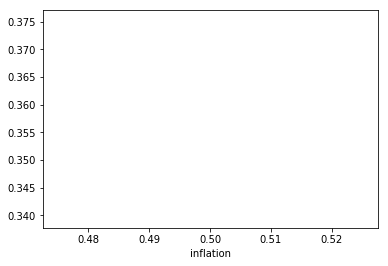

In [46]:
df=pd.read_csv("PO.csv")
rmse=df.values
print(rmse.shape)
R = rmse[:,1].reshape(5,1)
print(R)
y = [1.5+0.1*i for i in range(5)]
x = [0.5+0.1*j for j in range(1)]
Rsigma=[min(R[i,:]) for i in range(5)]
plt.plot(y,Rsigma)
plt.xlabel("sigma")
plt.show()
Rbeta = [min(R[:,i]) for i in range(1)]
plt.plot(x,Rbeta)
plt.xlabel("inflation")
plt.show()

[0.3231193839799868, 0.2965883753035106, 0.2717158055897747, 0.2770254181895041, 0.297613235963786, 0.2938469598275201, 0.2797908979698874, 0.2828170238691817, 0.29995956076901215, 0.2965493275221229]


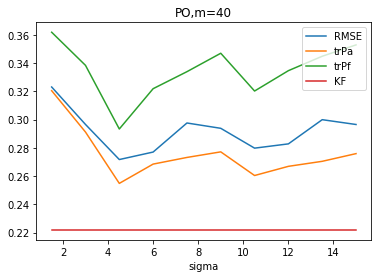

No handles with labels found to put in legend.


[0.5842270400180551, 0.9322990377001106, 1.0687999118899327, 1.1319880060612535, 1.1353684864363498, 1.2801617223699189, 1.4668051980307528, 1.3527374496481397, 1.5704765257204532, 1.5887487545544605]


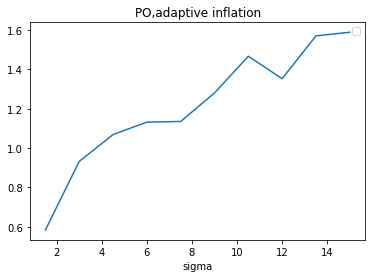

In [3]:
print(RMSE)
KF = np.ones(np.array(B).size)*0.221851
plt.plot(B,RMSE,label="RMSE")
plt.plot(B,TrPa,label="trPa")
plt.plot(B,TrPf,label="trPf")
plt.plot(B,KF,label="KF")
plt.xlabel("sigma")
plt.title("PO,m=40")
#plt.plot(R_,label="RMSE")
#plt.plot(RO,label="ObsesrvationRMSE")
#plt.plot(trPa,label="trPa")
#plt.plot(trPf,label="trPf")
plt.legend()
#plt.savefig("POm=30.jpg")
plt.show()

print(A_)
plt.plot(B,A_)
plt.title("PO,adaptive inflation")
plt.xlabel("sigma")
#plt.plot(R_,label="RMSE")
#plt.plot(RO,label="ObsesrvationRMSE")
#plt.plot(trPa,label="trPa")
#plt.plot(trPf,label="trPf")
plt.legend()
#plt.savefig("POm=30alpha.jpg")
plt.show()

(9, 10)


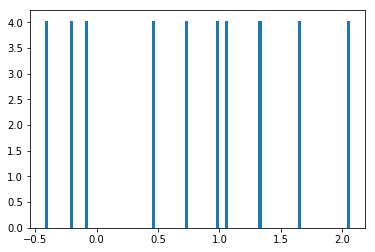

In [4]:
from numpy.random import *
from matplotlib import pyplot as plt

N=10
m=10
a=1

mu = np.zeros(N-a)
sigma = np.eye(N-a)
values = multivariate_normal(mu,sigma,m)
EO = values.T
print(EO.shape)

plt.hist(EO[2,:],bins=100,density=True)
plt.show()

In [8]:
from numpy.random import *
N=2
mu = np.zeros(N)
sigma = np.eye(N)
#values = multivariate_normal(mu,sigma,N)
values=np.array([[5,2],[2,7]])
A_inv = np.linalg.inv(values)
print(values)
(la,v) = np.linalg.eigh(values)
D = np.diag(la)
D_inv = np.linalg.inv(D)
U = np.array(v).reshape(N,N)
Q,R = np.linalg.qr(U)

I = U.T @ U
T = Q @ D
X = T @ T.T

print(A_inv)
print(U @ D_inv @ U.T)

[[5 2]
 [2 7]]
[[ 0.22580645 -0.06451613]
 [-0.06451613  0.16129032]]
[[ 0.22580645 -0.06451613]
 [-0.06451613  0.16129032]]


In [5]:
dX = [[i,i+1,i+2] for i in range(4)]
print(np.ones(np.array(dX).size))
dXf = np.array(dX).reshape(4,3).T
print(dXf)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]]


4
